# Credit Card Fraud Detection

Features V1, V2, ... V28 are obtained with Principle Component Analysis transformation due to confidentiality issues.

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

C:\Users\mibiy\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [33]:
# import dataset
df = pd.read_csv("creditcard.csv")
print(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
# see percentage of fraud in all transactions # class=1 - fraud; class=0 - non-fraud
fraud = df[df.Class==1].index
nonfraud = df[df.Class==0].index
fraud_num = len(fraud)
nofraud_num = len(nonfraud)
fraud_perc=round(fraud_num/(fraud_num+nofraud_num),5)*100
print("the percentage of fraud in all transactions is ", fraud_perc, "%")

the percentage of fraud in all transactions is  0.173 %


Text(0.5,1,'Correlation Heatmap')

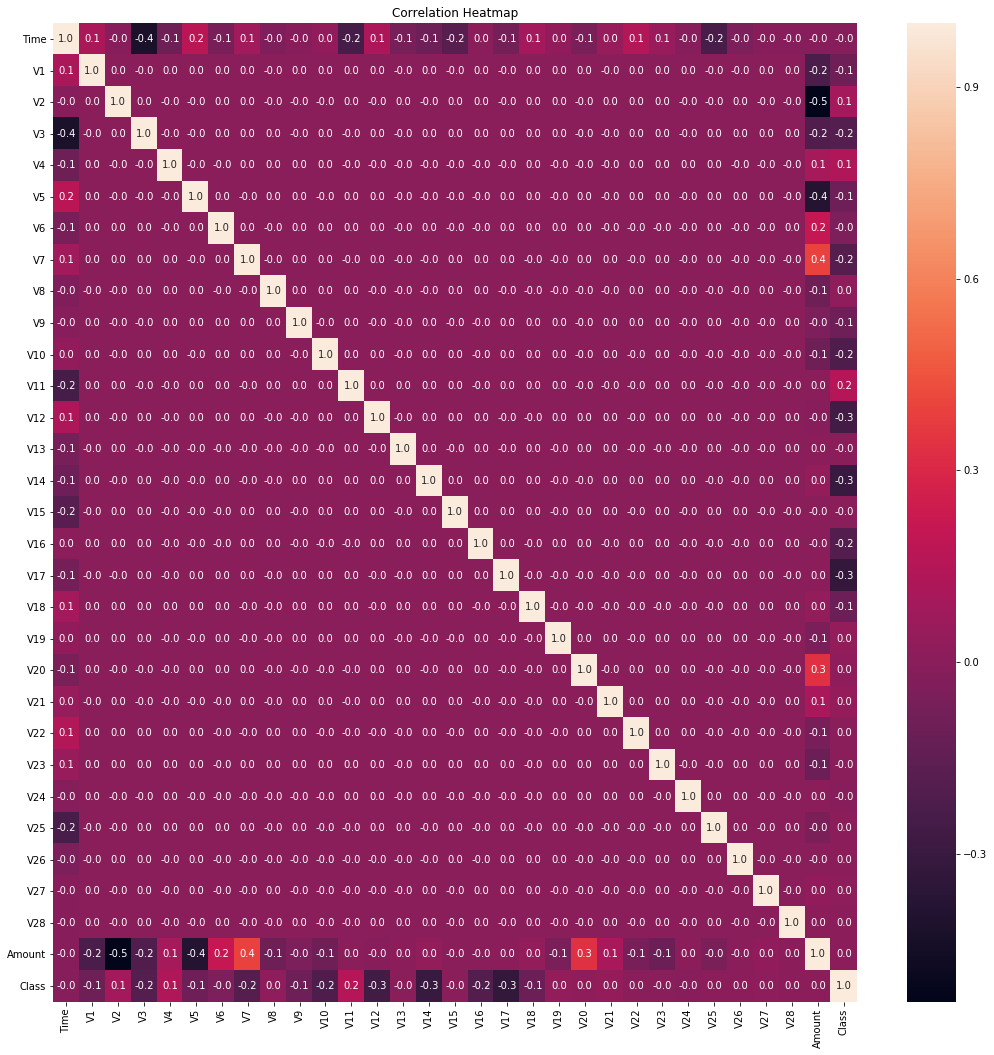

In [4]:
# correlation heatmap
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True, fmt=".1f")
plt.title("Correlation Heatmap")

Text(0.5,0,'Transaction Amount in $')

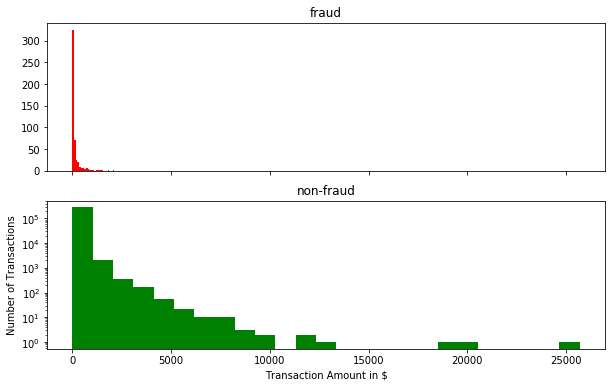

In [5]:
# feature - "Amount" - comparing transaction amount of fraud & non-fraud transactions
fig, (ax1, ax2) =plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(10,6))

ax1.hist(df.Amount[df.Class==1], bins=25, color="Red")
ax1.set_title("fraud")

ax2.hist(df.Amount[df.Class==0], bins=25, color="Green")
ax2.set_title("non-fraud")

plt.yscale('log', nonposy='clip')
plt.ylabel("Number of Transactions")
plt.xlabel("Transaction Amount in $")

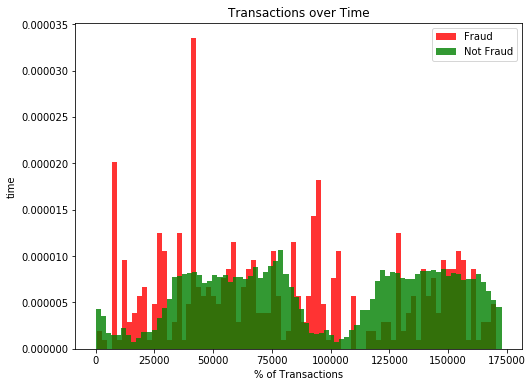

In [6]:
# all transactions over time
bins=80
plt.figure(figsize=(8,6))
plt.hist(df.Time[df.Class==1],bins=bins, density=True, alpha=0.8,label='Fraud',color='Red')
plt.hist(df.Time[df.Class==0],bins=bins, density=True, alpha=0.8,label='Not Fraud',color='Green')
plt.title('Transactions over Time')
plt.xlabel("% of Transactions")
plt.ylabel("time")
plt.legend()

In [7]:
# compare features V1-V28 of fraud and non-fraud transactions
x = df.drop(["Class", "Time", "Amount"], axis=1)
y = df.Class

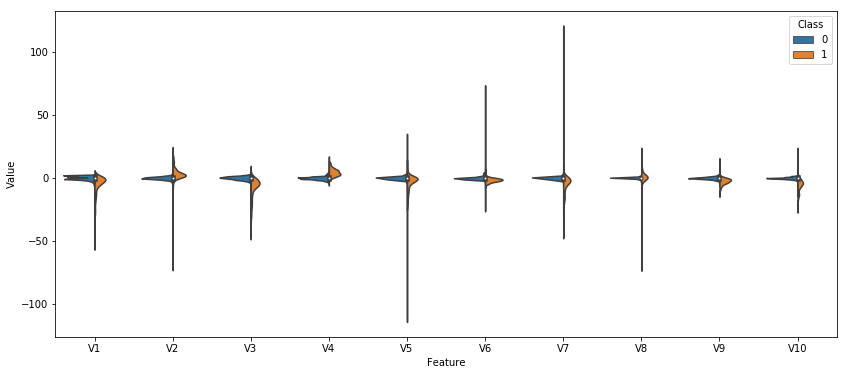

In [8]:
# have a look at the first ten features: V1-V10
first10=pd.concat([y,x.iloc[:,0:10]],axis=1)
first10=pd.melt(first10,id_vars="Class",var_name="Feature",value_name='Value')
plt.figure(figsize=(14,6))
sns.violinplot(x="Feature",y="Value",hue="Class",data=first10, split=True)

In [9]:
# to make the feature difference more visible between fraud & non-fraud transactions, let's scale feature values
x_scaled=(x-x.min())/(x.max()-x.min())
x_scaled.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490


In [10]:
feature1_10=pd.concat([y,x_scaled.iloc[:,0:10]],axis=1)
feature11_20=pd.concat([y,x_scaled.iloc[:,10:19]],axis=1)
feature21_28=pd.concat([y,x_scaled.iloc[:,19:28]],axis=1)
feature1_10=pd.melt(feature1_10,id_vars="Class",var_name="Feature",value_name='Value')
feature11_20=pd.melt(feature11_20,id_vars="Class",var_name="Feature",value_name='Value')
feature21_28=pd.melt(feature21_28,id_vars="Class",var_name="Feature",value_name='Value')

Text(0.5,1,'Feature V1-V10')

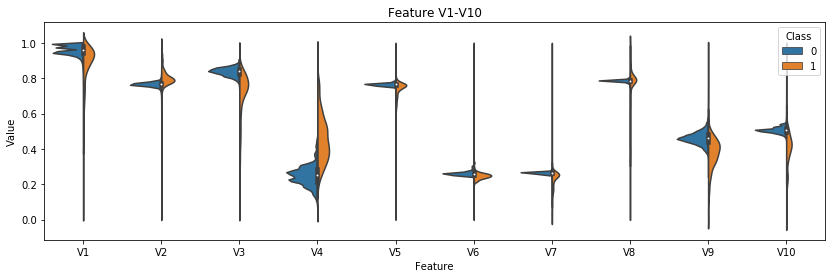

In [11]:
plt.figure(figsize=(14,4))
sns.violinplot(x="Feature",y="Value",hue="Class",data=feature1_10, split=True)
plt.title("Feature V1-V10")

Text(0.5,1,'Feature V11-V2O')

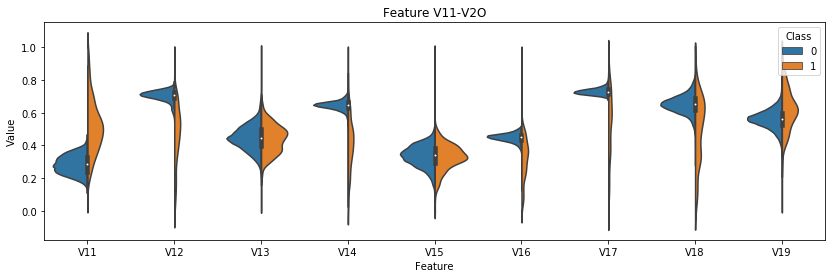

In [12]:
plt.figure(figsize=(14,4))
sns.violinplot(x="Feature",y="Value",hue="Class",data=feature11_20, split=True)
plt.title("Feature V11-V2O")

Text(0.5,1,'Feature V21-V28')

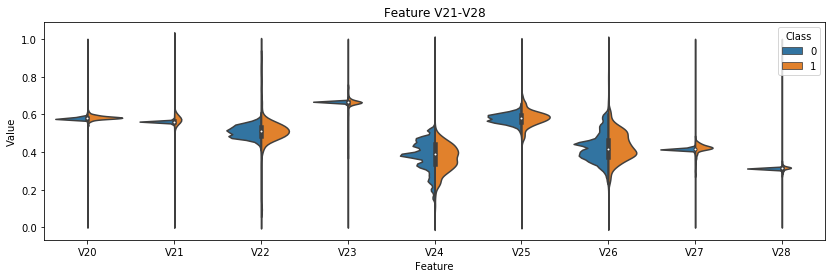

In [13]:
plt.figure(figsize=(14,4))
sns.violinplot(x="Feature",y="Value",hue="Class",data=feature21_28, split=True)
plt.title("Feature V21-V28")

## Build A Linear Classifier With Adagrad Optimizer
- Adagrad Optimizer can automaticallty adjust learning rate

In [14]:
# drop features that have very little difference between fraud and non-fraud transactions
X = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','Time','Class'],axis=1)
# standardization of feauture "Amount"
from sklearn.preprocessing import StandardScaler
X.Amount= StandardScaler().fit_transform(X['Amount'].values.reshape(-1, 1))
y = df.Class

In [15]:
# split traing and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=5)

In [16]:
# define feature columns in tensorflow
V01 = tf.feature_column.numeric_column('V1')
V02 = tf.feature_column.numeric_column('V2')
V03 = tf.feature_column.numeric_column('V3')
V04 = tf.feature_column.numeric_column('V4')
V05 = tf.feature_column.numeric_column('V5')
V06 = tf.feature_column.numeric_column('V6')
V07 = tf.feature_column.numeric_column('V7')
V09 = tf.feature_column.numeric_column('V9') 
V10 = tf.feature_column.numeric_column('V10')
V11 = tf.feature_column.numeric_column('V11')
V12 = tf.feature_column.numeric_column('V12')
V14 = tf.feature_column.numeric_column('V14')
V16 = tf.feature_column.numeric_column('V16')
V17 = tf.feature_column.numeric_column('V17')
V18 = tf.feature_column.numeric_column('V18')
V19 = tf.feature_column.numeric_column('V19')
V21 = tf.feature_column.numeric_column('V21')
V22 = tf.feature_column.numeric_column('V22')
Vamt = tf.feature_column.numeric_column('Amount')

features=[V01,V02,V03,V04,V05,V06,V07,V09,V10,V11,V12,V14,V16,V17,V18,V19,V21,Vamt]

In [17]:
# define input function would feed Pandas DataFrame into the model
input=tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=100,num_epochs=1000,shuffle=True)

In [18]:
# define classifer - linear classifier
model=tf.estimator.LinearClassifier(feature_columns=features,n_classes=2, optimizer="Adagrad")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\mibiy\\AppData\\Local\\Temp\\tmp_u3gqzwi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F8884DD630>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
# train model
model.train(input_fn=input,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\mibiy\AppData\Local\Temp\tmp_u3gqzwi\model.ckpt.
INFO:tensorflow:loss = 69.31474, step = 1
INFO:tensorflow:global_step/sec: 128.732
INFO:tensorflow:loss = 8.118046, step = 101 (0.790 sec)
INFO:tensorflow:global_step/sec: 147.413
INFO:tensorflow:loss = 4.4544487, step = 201 (0.674 sec)
INFO:tensorflow:global_step/sec: 152.007
INFO:tensorflow:loss = 3.1202888, step = 301 (0.649 sec)
INFO:tensorflow:global_step/sec: 139.07
INFO:tensorflow:loss = 2.4283116, step = 401 (0.726 sec)
INFO:tensorflow:global_step/sec: 132.229
INFO:tensorflow:loss = 2.0206318, step = 501 (0.758 sec)
INFO:tensorflow:global_step/sec: 144.782
INFO:tensorflow:loss = 1.6640524, step = 601 (0.698 sec)
INFO:tensorflow:global_step/sec: 139.255
INFO:tensorflow:loss = 1.4292719, step = 701 (0.710 sec)
INFO:tensorflow:global_step/sec: 150.784
INFO:tensorflow:loss = 1.3029375, step = 801 (0.663 sec)
INFO:tensorflow:global_step/

In [20]:
# evaluate model performance with training data
result_train=model.evaluate(tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10, num_epochs=1, shuffle=False))
print(result_train)

INFO:tensorflow:Starting evaluation at 2018-07-22-02:31:25
INFO:tensorflow:Restoring parameters from C:\Users\mibiy\AppData\Local\Temp\tmp_u3gqzwi\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-22-02:32:59
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9992025, accuracy_baseline = 0.9982745, auc = 0.9763705, auc_precision_recall = 0.73565185, average_loss = 0.013306155, global_step = 1000, label/mean = 0.0017254871, loss = 0.13305755, prediction/mean = 0.011701868
{'accuracy': 0.9992025, 'accuracy_baseline': 0.9982745, 'auc': 0.9763705, 'auc_precision_recall': 0.73565185, 'average_loss': 0.013306155, 'label/mean': 0.0017254871, 'loss': 0.13305755, 'prediction/mean': 0.011701868, 'global_step': 1000}


In [21]:
# evaluate model performance with testing data
input_test = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10, num_epochs=1, shuffle=False)
result_test=model.evaluate(input_test)
print(result_test)

INFO:tensorflow:Starting evaluation at 2018-07-22-02:33:06
INFO:tensorflow:Restoring parameters from C:\Users\mibiy\AppData\Local\Temp\tmp_u3gqzwi\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-22-02:33:43
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.99921584, accuracy_baseline = 0.9982678, auc = 0.9675595, auc_precision_recall = 0.7791059, average_loss = 0.0128318155, global_step = 1000, label/mean = 0.0017321489, loss = 0.12830764, prediction/mean = 0.011621637
{'accuracy': 0.99921584, 'accuracy_baseline': 0.9982678, 'auc': 0.9675595, 'auc_precision_recall': 0.7791059, 'average_loss': 0.0128318155, 'label/mean': 0.0017321489, 'loss': 0.12830764, 'prediction/mean': 0.011621637, 'global_step': 1000}


In [22]:
# Prediction
input_pred= tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)
prediction = model.predict(input_pred)
y_pred = [d['logits'] for d in prediction]
y_pred

INFO:tensorflow:Restoring parameters from C:\Users\mibiy\AppData\Local\Temp\tmp_u3gqzwi\model.ckpt-1000


[array([-4.62012], dtype=float32),
 array([-3.634228], dtype=float32),
 array([-4.5299735], dtype=float32),
 array([-4.4898434], dtype=float32),
 array([-4.568673], dtype=float32),
 array([-4.724004], dtype=float32),
 array([-4.683505], dtype=float32),
 array([-4.5699496], dtype=float32),
 array([-4.6325636], dtype=float32),
 array([-4.6720476], dtype=float32),
 array([-5.134075], dtype=float32),
 array([-4.3644605], dtype=float32),
 array([-4.547655], dtype=float32),
 array([-4.598994], dtype=float32),
 array([-4.4785237], dtype=float32),
 array([-4.586548], dtype=float32),
 array([-4.680117], dtype=float32),
 array([-5.310302], dtype=float32),
 array([-4.755239], dtype=float32),
 array([-4.725271], dtype=float32),
 array([-4.5875587], dtype=float32),
 array([-4.805899], dtype=float32),
 array([-4.6629443], dtype=float32),
 array([-3.9432514], dtype=float32),
 array([-4.707106], dtype=float32),
 array([-4.5907373], dtype=float32),
 array([-4.6923676], dtype=float32),
 array([-4.311612

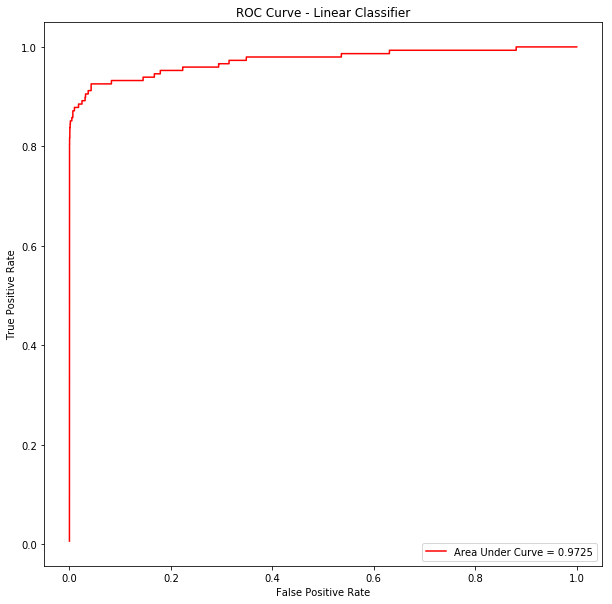

In [23]:
# ROC Curve
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test, y_pred)
roc_auc=metrics.auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.title('ROC Curve - Linear Classifier')
plt.plot(fpr, tpr, 'r', label='Area Under Curve = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##  Build A Neutral Network To Improve Prediction Accuracy

In [34]:
# use all the attributes
x_neural=df.drop(['Class'],axis=1)
x_scaled_neural=(x_neural-x_neural.min())/(x_neural.max()-x_neural.min())
y_neural=df.Class
from sklearn.model_selection import train_test_split
x_train_neural,x_test_neural,y_train_neural,y_test_neural=train_test_split(x_scaled_neural,y_neural,test_size=0.3)

In [35]:
# feed data
def to_one_hot(c, depth):
    i=np.identity(depth)
    return i[c,:]

def train_batch(batch_size):
    for j in range(int(len(x_train_neural)/batch_size)):
        start=batch_size*j
        end=start+batch_size
        
        train_x_batch=x_train_neural[start:end]
        train_y_batch=y_train_neural[start:end]
        
        train_y_batch=np.apply_along_axis(lambda x:to_one_hot(x,depth=2),0,train_y_batch)
        
        yield train_x_batch, train_y_batch
        
def get_test_data():
    return x_test_neural, np.apply_along_axis(lambda x: to_one_hot(x, depth=2), 0, y_test_neural)

Epoch 1 loss: 169.0390569618992
Epoch 2 loss: 8.083136622837173
Epoch 3 loss: 7.704049995430523


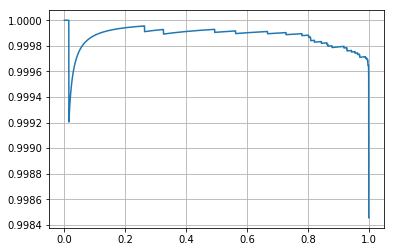

Average Precision: 0.9998728982126247


In [36]:
# define model
X= tf.placeholder(tf.float32, [None, 30])
Y= tf.placeholder(tf.float32, [None, 2]) 

def forward_propogation(X): 
    num_neural= 10
    weights={"lvl_1": tf.Variable(tf.random_normal([30,num_neural])), 
               "output": tf.Variable(tf.random_normal([num_neural,2]))}
    
    biases={"lvl_1": tf.Variable(tf.random_normal([num_neural])), 
            "output": tf.Variable(tf.random_normal([2]))}
    
    h1=tf.add(tf.matmul(X, weights["lvl_1"]), biases["lvl_1"])
    h1=tf.nn.relu(h1)
    
    h2=tf.add(tf.matmul(h1, weights["output"]), biases["output"])
    output=tf.nn.relu(h2)
    
    return output

# Minimize loss
logits=forward_propogation(X)
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits))
optimizer=tf.train.AdamOptimizer(0.01).minimize(loss) 

# Confusion matrix accuracy
correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) 

# Precision-recall curve
from sklearn.metrics import average_precision_score, precision_recall_curve

decision_variable = tf.nn.softmax(logits) 

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    
    # train phase
    batch_size = 128
    n_epochs = 3
    for epoch in range(n_epochs):
        epoch_loss = 0
        batch_generator = train_batch(batch_size)
        for batch in batch_generator:
            batch_x, batch_t = batch 
            _, curr_loss = sess.run([optimizer, loss], feed_dict={Y: batch_t, X: batch_x})
            epoch_loss += curr_loss
            
        print("Epoch " + str(epoch+1) + " loss: " + str(epoch_loss))
        
    # test phase
    test_x, test_t = get_test_data()
    test_y = sess.run(decision_variable, feed_dict={X: test_x})
    
    avg_score = average_precision_score(test_t[:,0], test_y[:,0])
    precision, recall, _ = precision_recall_curve(test_t[:,0], test_y[:,0])

    # plot pr curve
    plt.plot(recall, precision)
    plt.grid()
    plt.show()
    
    # print average precision
    print("Average Precision:", avg_score)